In [ ]:

import numpy as np 
import pandas as pd 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/social media influencers-INSTAGRAM - -DEC 2022.csv")
df


,Rank,name,instagram name,Category_1,Category_2,followers,country,Eng. (Auth.),Eng. (Avg.)
0,1,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M
1,2,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M
2,3,neymarjr,NJ 🇧🇷,Sports with a ball,NaN,198.9M,Brazil,6.7M,9.5M
3,4,kyliejenner,Kylie 🤍,Fashion,Modeling,376.3M,United States,2.7M,4.3M
4,5,kendalljenner,Kendall,Modeling,Fashion,268M,United States,3.2M,5M
...,...,...,...,...,...,...,...,...,...
995,996,thiago6,Thiago Alcantara,Sports with a ball,NaN,10.4M,United Kingdom,129.9K,222.7K
996,997,soycintiacossio,Cintia Cossio,Modeling,Adult content,6M,Colombia,313.4K,390.6K
997,998,feat.dino,이찬,Lifestyle,NaN,2.7M,South Korea,716.6K,876.4K
998,999,djokernole,Novak Djokovic,Sports with a ball,NaN,11.8M,United States,158.6K,197.5K


In [ ]:
df["Followers"]=df["followers"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
df["Engagement Avg"]=df["Eng. (Avg.)"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)


In [ ]:
df.drop(['followers','Eng. (Avg.)','Category_2','Eng. (Auth.)','instagram name','Rank'],axis=1,inplace=True)

In [ ]:
df =df.rename(columns = {'Category_1':'Category','name':'Name','country':'Country'})
df

,Name,Category,Country,Followers,Engagement Avg
0,leomessi,Sports with a ball,Argentina,409800000,23400000
1,cristiano,Sports with a ball,India,523000000,14700000
2,neymarjr,Sports with a ball,Brazil,198900000,9500000
3,kyliejenner,Fashion,United States,376300000,4300000
4,kendalljenner,Modeling,United States,268000000,5000000
...,...,...,...,...,...
995,thiago6,Sports with a ball,United Kingdom,10400000,222700
996,soycintiacossio,Modeling,Colombia,6000000,390600
997,feat.dino,Lifestyle,South Korea,2700000,876400
998,djokernole,Sports with a ball,United States,11800000,197500


In [ ]:
df.isnull().sum()

Name               0
Category          50
Country            1
Followers          0
Engagement Avg     0
dtype: int64

In [ ]:
df=df.fillna('None')
df

,Name,Category,Country,Followers,Engagement Avg
0,leomessi,Sports with a ball,Argentina,409800000,23400000
1,cristiano,Sports with a ball,India,523000000,14700000
2,neymarjr,Sports with a ball,Brazil,198900000,9500000
3,kyliejenner,Fashion,United States,376300000,4300000
4,kendalljenner,Modeling,United States,268000000,5000000
...,...,...,...,...,...
995,thiago6,Sports with a ball,United Kingdom,10400000,222700
996,soycintiacossio,Modeling,Colombia,6000000,390600
997,feat.dino,Lifestyle,South Korea,2700000,876400
998,djokernole,Sports with a ball,United States,11800000,197500


<Axes: >

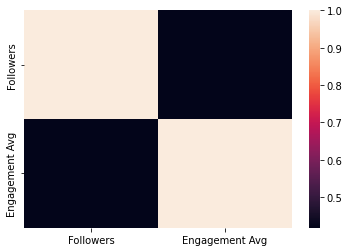

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

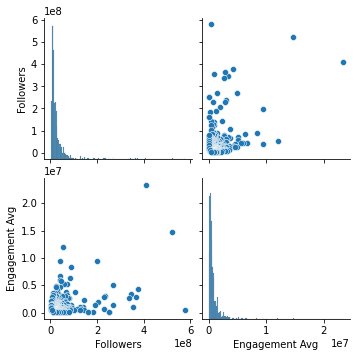

In [ ]:
sns.pairplot(df)

<Axes: xlabel='Followers', ylabel='Engagement Avg'>

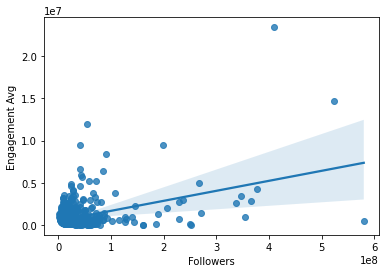

In [ ]:
sns.regplot(y='Engagement Avg',x='Followers',data=df)

In [ ]:
df['Engagement Rate']=np.round((df['Engagement Avg']/df['Followers'])*100,3)
df

,Name,Category,Country,Followers,Engagement Avg,Engagement Rate
0,leomessi,Sports with a ball,Argentina,409800000,23400000,5.710
1,cristiano,Sports with a ball,India,523000000,14700000,2.811
2,neymarjr,Sports with a ball,Brazil,198900000,9500000,4.776
3,kyliejenner,Fashion,United States,376300000,4300000,1.143
4,kendalljenner,Modeling,United States,268000000,5000000,1.866
...,...,...,...,...,...,...
995,thiago6,Sports with a ball,United Kingdom,10400000,222700,2.141
996,soycintiacossio,Modeling,Colombia,6000000,390600,6.510
997,feat.dino,Lifestyle,South Korea,2700000,876400,32.459
998,djokernole,Sports with a ball,United States,11800000,197500,1.674


In [ ]:
Target = []
for value in df["Engagement Rate"]:
    if value < 3.5:
        Target.append(0)
    else:
        Target.append(1)
      
    
    
df["Target"] = Target  
df

,Name,Category,Country,Followers,Engagement Avg,Engagement Rate,Target
0,leomessi,Sports with a ball,Argentina,409800000,23400000,5.710,1
1,cristiano,Sports with a ball,India,523000000,14700000,2.811,0
2,neymarjr,Sports with a ball,Brazil,198900000,9500000,4.776,1
3,kyliejenner,Fashion,United States,376300000,4300000,1.143,0
4,kendalljenner,Modeling,United States,268000000,5000000,1.866,0
...,...,...,...,...,...,...,...
995,thiago6,Sports with a ball,United Kingdom,10400000,222700,2.141,0
996,soycintiacossio,Modeling,Colombia,6000000,390600,6.510,1
997,feat.dino,Lifestyle,South Korea,2700000,876400,32.459,1
998,djokernole,Sports with a ball,United States,11800000,197500,1.674,0


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Target','Name','Category','Country',], axis=1)
y = df["Target"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LogisticRegression()
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        98

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

SVC()
78.0
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       102
           1       0.76      0.81      0.78        98

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200

KNeighborsClassifier()
94.0
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       102
           1       1.00      0.88      0.93        98

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted

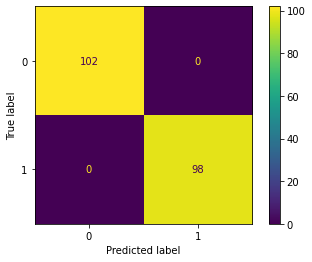

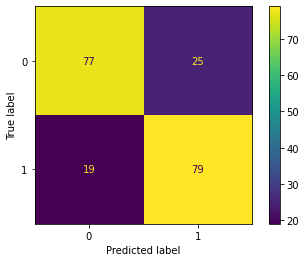

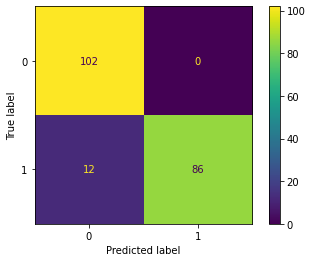

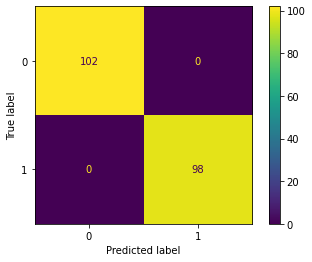

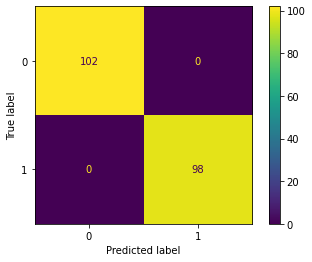

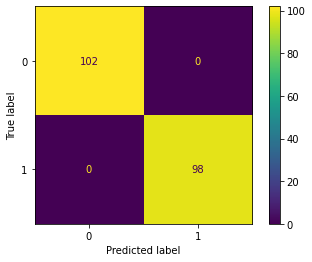

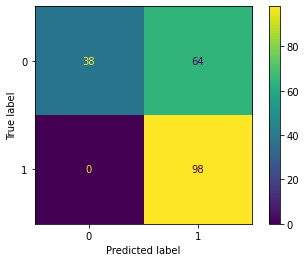

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
lr=LogisticRegression()
sv=SVC()
knn=KNeighborsClassifier()
dc=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
gn=GaussianNB()
lst=[lr,sv,knn,dc,rf,ad,gn]
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
df=df.sort_values(by=['Followers'],ascending=False)
df=df.head(5)
df

,Name,Category,Country,Followers,Engagement Avg,Engagement Rate,Target
22,instagram,Photography,India,579800000,466400,0.080,0
1,cristiano,Sports with a ball,India,523000000,14700000,2.811,0
0,leomessi,Sports with a ball,Argentina,409800000,23400000,5.710,1
3,kyliejenner,Fashion,United States,376300000,4300000,1.143,0
6,selenagomez,Photography,United States,365400000,2900000,0.794,0


<Axes: xlabel='Name', ylabel='Engagement Rate'>

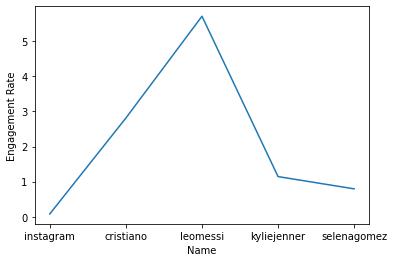

In [ ]:
sns.lineplot(x='Name',y='Engagement Rate',data=df)

<Axes: xlabel='Followers', ylabel='Engagement Avg'>

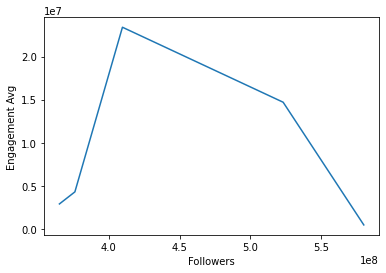

In [ ]:
sns.lineplot(x='Followers',y='Engagement Avg',data=df)

<Axes: xlabel='Name', ylabel='Followers'>

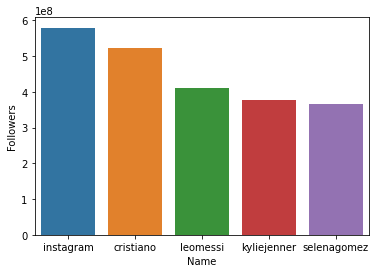

In [ ]:
sns.barplot(x='Name',y='Followers',data=df)

In [ ]:
pred=rf.predict([[579800000,555564000,0.080]])
pred

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])